In [165]:
import numpy as np
import matplotlib.pyplot as plt
import os, pickle

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [218]:
def print_board(board):
    n = len(board)
    print("   " + "  ".join(str(i) for i in range(n)))
    print("  +" + "-" * (3 * n - 1) + "+")
    for i in range(n):
        row = board[i]
        print(f"{i} |" + "|".join(cell.center(2) for cell in row) + "|")
        if i < n - 1:
            print("  +" + "-" * (3 * n - 1) + "+")
    print("  +" + "-" * (3 * n - 1) + "+")
    
def plot_data(x, y1, y2, y2_err, y3, xlabel=None, save_path=None):

    # Plot the first list
    plt.plot(x, y1, color='green', marker='o', linestyle='-', label='Teach-TIE(Ours)')

    # Plot the second list with error bars
    plt.errorbar(x, y2, yerr=y2_err, color='blue', marker='o', linestyle='-', label='Teach-Random')

    # Plot the third list
    plt.plot(x, y3, color='brown', marker='o', linestyle='-', label='Teach-All')

    # Add grid and labels
    plt.grid(True)
    
    if(xlabel):
        plt.xlabel(xlabel, fontsize='x-large')
    else:
        plt.xlabel('n', fontsize='x-large')
        
    plt.ylabel('teaching set size', fontsize='x-large')

    # Set xticks to integers
    plt.xticks(x, x)
    plt.yscale('log')
    # Add legend and show plot
    plt.legend(fontsize="x-large")

    if(save_path):
        plt.savefig(save_path)

    plt.show()

def initialize_grid_world(n):
    # Create an n x n board with all cells initially empty
    board = [[' ' for _ in range(n)] for _ in range(n)]

    # Generate random positions for the agent and goal cells
    positions = random.sample([(i, j) for i in range(n) for j in range(n)], 2)
    agent_pos, goal_pos = positions

    # Generate random orientation for the agent
    orientations = ['U', 'D', 'L', 'R']  # U: Up, D: Down, L: Left, R: Right
    agent_orientation = random.choice(orientations)

    # Place the agent and goal cells on the board
    board[agent_pos[0]][agent_pos[1]] = agent_orientation
    board[goal_pos[0]][goal_pos[1]] = 'G'

    return board, agent_pos, goal_pos, agent_orientation


def plot_grid(board, agent_pos, agent_orientation, opt_action_img, save_path=None):
    fig, ax = plt.subplots()
    n = len(board)
    ax.set_aspect('equal')  # Set the aspect ratio of the plot to be square
    
    # Define colors and styles
    background_color = '#34A853'   # medium green margin background color
    cell_color = '#CEEAD6'   # Light green cell background color

    # Set background color
    # fig.patch.set_facecolor(background_color)

    # Draw cells
    for i in range(n):
        for j in range(n):
            # Draw each cell with the background color
            ax.add_patch(patches.Rectangle((j, n-i-1), 1, 1, fill=True, color=cell_color))
            
            if board[i][j] == 'G':
                goal_img = get_goal_image()
                imagebox = OffsetImage(goal_img, zoom=0.095)
                ab = AnnotationBbox(imagebox, (j+0.5, n-i-0.5), frameon=False)
                ax.add_artist(ab)

            elif board[i][j] in ['U', 'D', 'L', 'R']:
                orientation = board[i][j]
                
                agent_img = get_agent_image(orientation)
                imagebox = OffsetImage(agent_img, zoom=0.075)
                ab = AnnotationBbox(imagebox, (j+0.5, n-i-0.5), frameon=False)
                ax.add_artist(ab)

    # # Add text for optimal action in the top-right corner
    # ax.text(n-3, 1, '$\pi^*(s)$', verticalalignment='bottom', horizontalalignment='right', fontsize=25, color='black', transform=ax.transData)

    if(opt_action_img is not None):
        # Add the PNG image to the top right corner
        opt_action_imagebox = OffsetImage(opt_action_img, zoom=0.5)
        ab = AnnotationBbox(opt_action_imagebox, (n//2, n+0.55), frameon=False)
        ax.add_artist(ab)

    # Set grid appearance
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_xticks([i for i in range(n+1)])
    ax.set_yticks([i for i in range(n+1)])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.gca().invert_yaxis()  # Invert y-axis to have the first row at the top in the plot

    # Adjust the margins
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  
    
    if save_path:
        plt.savefig(save_path)
    plt.show()


def get_action_image(action):

    action_img_path = os.path.join('../graphics', action+'.png')
    opt_action_img = mpimg.imread(action_img_path)
    return opt_action_img

def get_agent_image(orientation):
    img_path = os.path.join('../graphics/source_T'+orientation+'.png')
    angry_bird_img = mpimg.imread(img_path)
    return angry_bird_img

def get_goal_image():
    img_path = os.path.join('../graphics/goal.png')
    pig_img = mpimg.imread(img_path)
    return pig_img
    

In [214]:
instance_type = 'grid_world_navigation'      # ['pick_the_diamond', 'polygon_tower_range', 'grid_world_navigation']

base_path = '../outputs/TEACH-7'
file_path = os.path.join(base_path, 'all_output_list.pkl')

with open(file_path, "rb") as f:
    # Load the list of objects
    all_output_list = pickle.load(f)

f.close()


### Plot for Optimal Action in Block Programming Grid World Navigation example.

9408 [0, 1, 3, 7, 11, 15, 19, 23]


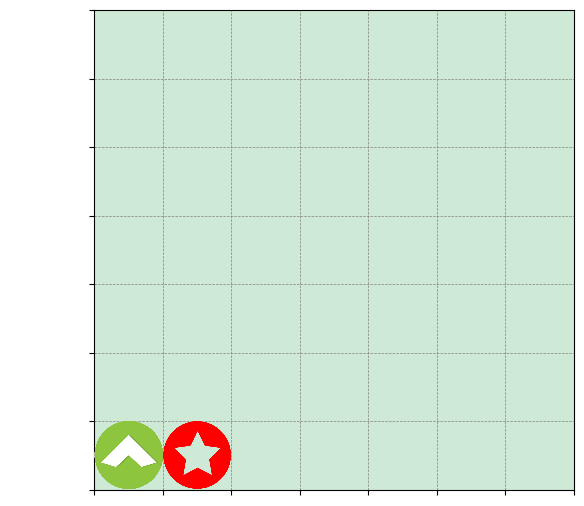

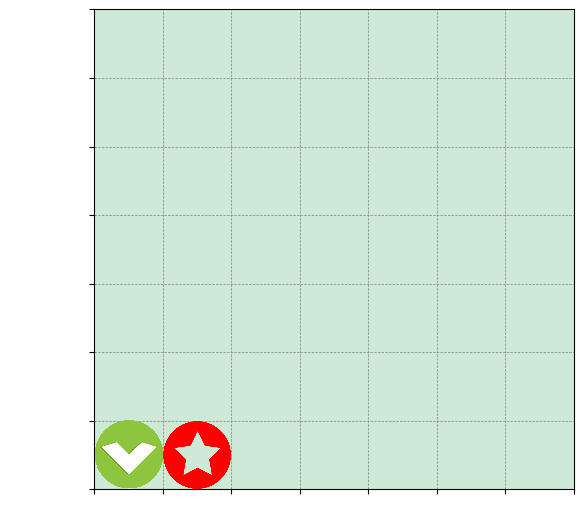

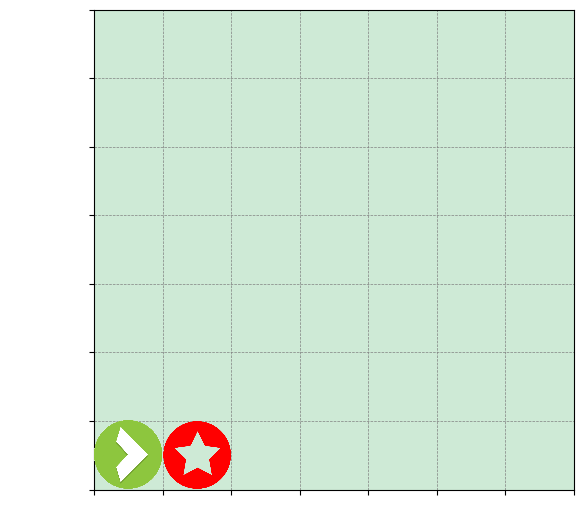

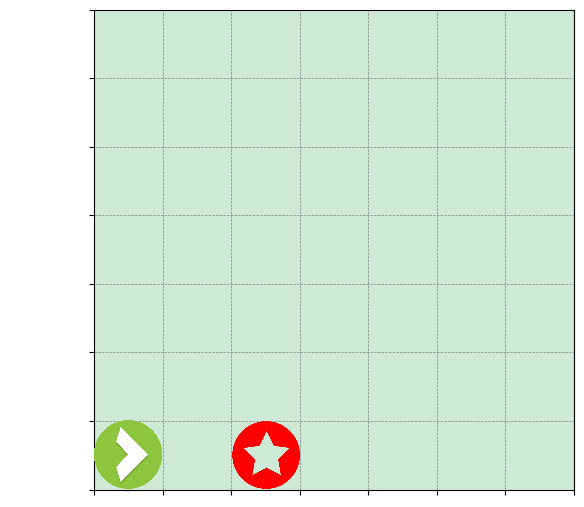

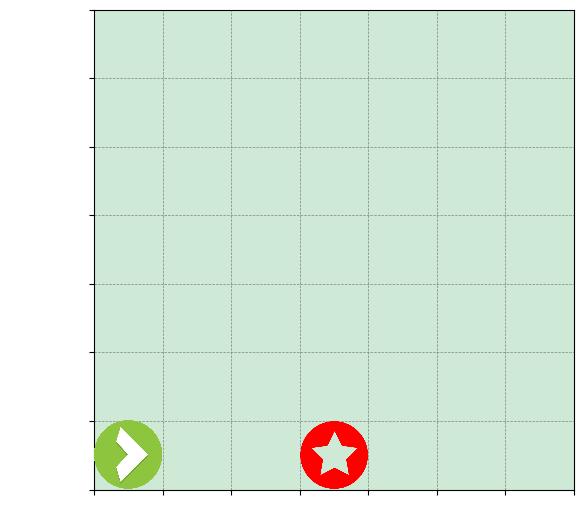

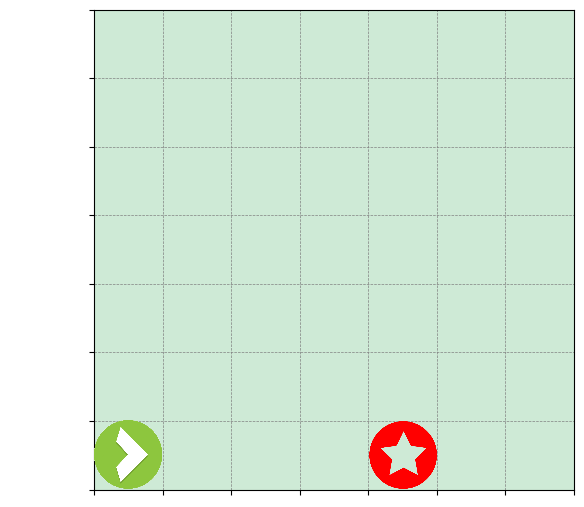

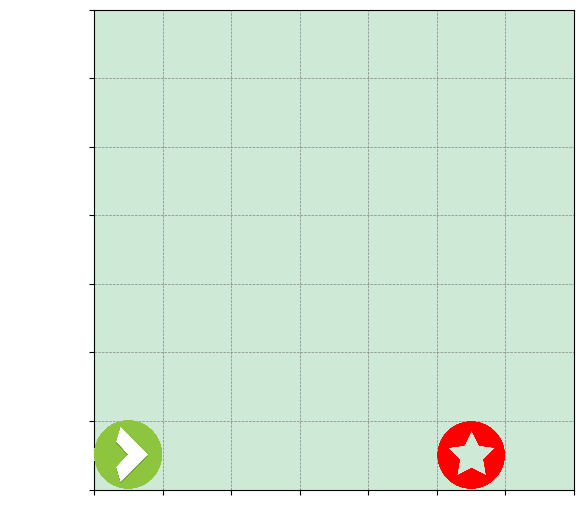

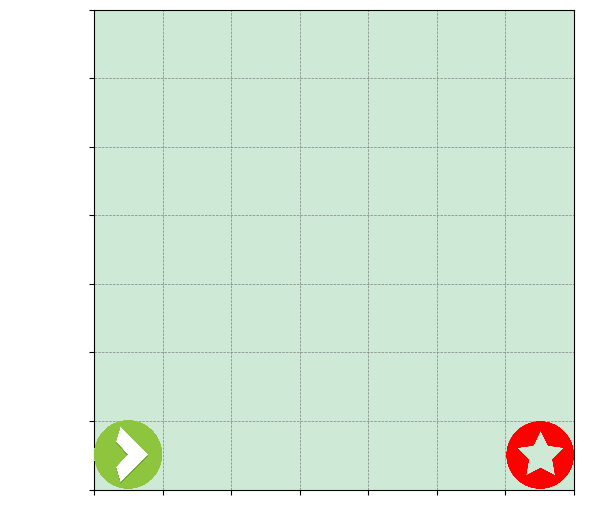

In [219]:
S, A, S_id_dic, pi, opt_teach_set, rand_teach_set_size, _, _ = all_output_list[0]


print(len(S), opt_teach_set)

board_base_path = os.path.join(base_path, 'boards')

if not os.path.exists(board_base_path):
    os.makedirs(board_base_path)


for i, s_id in enumerate(opt_teach_set):
    board, agent_pos, goal_pos, agent_orientation = S_id_dic[s_id]
    save_path = os.path.join(board_base_path, 'board_'+str(i)+'.pdf')
    # opt_action_img = get_action_image(pi[s_id])
    opt_action_img = None
    plot_grid(board, agent_pos, agent_orientation, opt_action_img, save_path)


### Plot Learning curve example for different examples


(4, 10.85, 6.84306218004776)
(5, 20.3, 18.09723735822681)
(6, 27.3, 18.210161998181125)
(7, 35.2, 24.477744994177876)
(8, 55.45, 38.316412932319224)
(9, 93.5, 76.70430235651713)
(10, 89.55, 56.13686400218665)
(11, 126.4, 80.15198063678775)


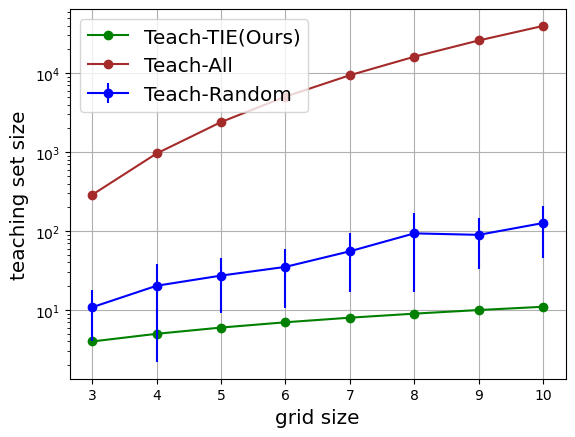

In [132]:
opt_teach_size_list, rand_teach_size_mean_list, rand_teach_size_std_list = [], [], []
for i, output_list in enumerate(all_output_list[:-1]):
    print(output_list)

    opt_teach_size, rand_teach_size_mean, rand_teach_size_std = output_list
    opt_teach_size_list.append(opt_teach_size)
    rand_teach_size_mean_list.append(rand_teach_size_mean)
    rand_teach_size_std_list.append(rand_teach_size_std)

x_parameters = all_output_list[-1]

if(instance_type=='pick_the_diamond'):
    xlabel = 'slot size'
    teach_all_size_list = [5**n-1 for n in x_parameters]
elif(instance_type=='polygon_tower_range'):
    xlabel = 'end state index'
elif(instance_type=='grid_world_navigation'):
    xlabel = 'grid size'
    teach_all_size_list = [4*(n**4-n**2) for n in x_parameters]
else:
    pass

save_path = os.path.join(base_path, instance_type+'_teaching_size_plot.pdf')
plot_data(x_parameters, opt_teach_size_list, rand_teach_size_mean_list, rand_teach_size_std_list, teach_all_size_list, xlabel, save_path)


### Test Example

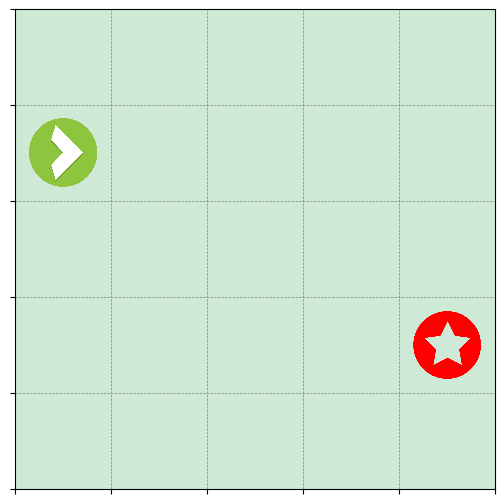

In [220]:
# Example usage:
n = 5
board, agent_pos, goal_pos, agent_orientation = initialize_grid_world(n)
board[agent_pos[0]][agent_pos[1]], board[goal_pos[0]][goal_pos[1]]  = '', ''

agent_pos, goal_pos = (3,0), (1,4)
board[agent_pos[0]][agent_pos[1]], board[goal_pos[0]][goal_pos[1]]  = 'R', 'G'

save_path = os.path.join(base_path, 'board.pdf')
plot_grid(board, agent_pos, agent_orientation, None, save_path)



In [201]:
save_path

'../outputs/TEACH-7/board.pdf'